In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dawn = pd.read_csv("../datasets/dawn_news_headline/categories_data.csv")

In [3]:
for x in df_dawn.Headline.values[0:100]:
    print(x)

Unprecedented briefing planned by Taliban
Economic decisions taken by cabinet ignored
Crisis called Pakistan`s Katrina Kerry urges world to extend more help
The unbearable lightness of Pakistan cricket
Pakistan cricket dealt another hard blow
Seven US troops  politician killed in Afghan attacks
Dadu under stress
Naval airbase  grid station hit Sujawal town goes under water
Appropriate punishment if charges proved: ICC
SC extends term of 32 Judges
Sindh AG calls for scrapping of Objectives Resolution
Absence of local govt felt in coping with crisis
Govt decides to convene CCI meeting this week
Town near Larkana under water; Thatta out of danger
Govt likely to seek moratorium on IMF loan
Boy shot dead
India kills 9 `infiltrators`
Appointment of ZTBL chief unlawful: LHC
Floods inflict Rs4bn loss on Railways
The `fake sheikh` who shook cricket
ATC rejects Lakhvi`s bail plea
IMF insists on tax  energy reforms
3 arrested  grilled and bailed in cricket probe
40 `militants` killed in Tirah
Mil

In [4]:
from collections import defaultdict, Counter, OrderedDict

from wordcloud import WordCloud

%matplotlib inline

import nltk
from nltk.corpus import stopwords

In [5]:
nltk.download('stopwords', download_dir="../resources/nltk/")

[nltk_data] Downloading package stopwords to ../resources/nltk/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
en_stopwords = set(stopwords.words('english'))

In [7]:
def detokenize_sentence(sentence):
    text = ''
    for token in sentence.split(" "):
        if text and any(c.isalnum() for c in token):
            text += ' '
        text += token
    return text

In [8]:
detokenize_sentence(df_dawn.Headline[1])

'Economic decisions taken by cabinet ignored'

In [9]:
def process(sentence):
    terms = []
    for term in sentence:
        term = term.lower()
        if term not in en_stopwords and term.isalnum():
            terms.append(term)
    return terms

In [10]:
from nltk.corpus import brown

In [11]:
nltk.download('brown')

[nltk_data] Downloading package brown to /home/wajeeh-
[nltk_data]     machine/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [12]:
df_dawn.Link_news[1].split("/")[4]

'558149'

In [13]:
df_dawn['doc_id'] = df_dawn.Link_news.apply(lambda x: x.split("/")[4])

In [14]:
import re

In [15]:
df_dawn.Headline = df_dawn.Headline.apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x).lower())

In [16]:
df_dawn

,PageType,Link_paper,Date,Link_news,Headline,doc_id
0,front-page,https://www.dawn.com/newspaper/front-page/2010...,2010-08-30,https://www.dawn.com/news/558270/unprecedented...,unprecedented briefing planned by taliban,558270
1,front-page,https://www.dawn.com/newspaper/front-page/2010...,2010-08-30,https://www.dawn.com/news/558149/economic-deci...,economic decisions taken by cabinet ignored,558149
2,front-page,https://www.dawn.com/newspaper/front-page/2010...,2010-08-30,https://www.dawn.com/news/558148/crisis-called...,crisis called pakistan s katrina kerry urges w...,558148
3,front-page,https://www.dawn.com/newspaper/front-page/2010...,2010-08-30,https://www.dawn.com/news/558131/the-unbearabl...,the unbearable lightness of pakistan cricket,558131
4,front-page,https://www.dawn.com/newspaper/front-page/2010...,2010-08-30,https://www.dawn.com/news/558130/pakistan-cric...,pakistan cricket dealt another hard blow,558130
...,...,...,...,...,...,...
19093,front-page,https://www.dawn.com/newspaper/front-page/2020...,2020-03-01,https://www.dawn.com/news/1537449/july-feb-tax...,july feb tax collection target missed by rs bn,1537449
19094,front-page,https://www.dawn.com/newspaper/front-page/2020...,2020-03-02,https://www.dawn.com/news/1537734/pakistan-wan...,pakistan wants us to keep eye on spoilers,1537734
19095,front-page,https://www.dawn.com/newspaper/front-page/2020...,2020-03-02,https://www.dawn.com/news/1537731/afghan-borde...,afghan border at chaman closed for seven days ...,1537731
19096,front-page,https://www.dawn.com/newspaper/front-page/2020...,2020-03-02,https://www.dawn.com/news/1537725/nepra-urges-...,nepra urges prime minister to declare power em...,1537725


In [17]:
docs = OrderedDict()

for fid in brown.fileids():
    docs[fid] = brown.sents(fid)

In [18]:
fid

'cr09'

In [19]:
docs = OrderedDict()

for fid in df_dawn.doc_id:
    docs[fid] = df_dawn[df_dawn.doc_id == fid].Headline.apply(lambda x: x.split(" "))

In [20]:
ix2doc = list(docs)
doc2ix = {fid: i for i, fid in enumerate(ix2doc)}

In [21]:
vocabulary = set()

term_counts = defaultdict(Counter)
document_counts = Counter()

for fid, doc in docs.items():
    unique_terms = set()
    for sentences in doc:
        sentence = process(sentences)
        term_counts[fid].update(sentences)
        unique_terms.update(sentence)
    document_counts.update(unique_terms)
    vocabulary.update(unique_terms)

ix2term = sorted(list(vocabulary))
term2ix = OrderedDict()

for i, term in enumerate(ix2term):
    term2ix[term.lower()] = i

In [22]:
import scipy.sparse as sparse

In [23]:
term_count_mat = sparse.dok_matrix((len(doc2ix), len(term2ix)))

In [24]:
for fid, i in doc2ix.items():
    for term, count in term_counts[fid].items():
        if term not in en_stopwords and not " ":
            j = term2ix[term.lower()]
            term_count_mat[i, j] = count
term_count_mat = term_count_mat.todense()

doc_count_vec = np.array([document_counts[term] for term in term2ix.keys()])

In [25]:
tf = np.log(term_count_mat + 1)
idf = len(doc2ix) / (1 + doc_count_vec)

tfidf = np.multiply(tf, idf)

In [26]:
tfidf.shape

(17769, 10640)

In [27]:
from sklearn.cluster import KMeans

In [28]:
K = 6
clusters = ['cluster#{}'.format(k) for k in range(K)]
model = KMeans(n_clusters=K, random_state=314)

In [29]:
clustered = model.fit_transform(tfidf)

/home/wajeeh-machine/anaconda3/envs/mytf2/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1133: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight)._transform(X)


In [30]:
clustered.shape

(17769, 6)

In [31]:
model.cluster_centers_.shape

(6, 10640)

In [32]:
cluster_term = pd.DataFrame(
    model.cluster_centers_.T, index=ix2term, columns=clusters)
cluster_term = np.round(cluster_term, decimals=4)

In [59]:
cluster_term[clusters[1]].value_counts()

0.0    10640
Name: cluster#1, dtype: int64

ZeroDivisionError: float division by zero

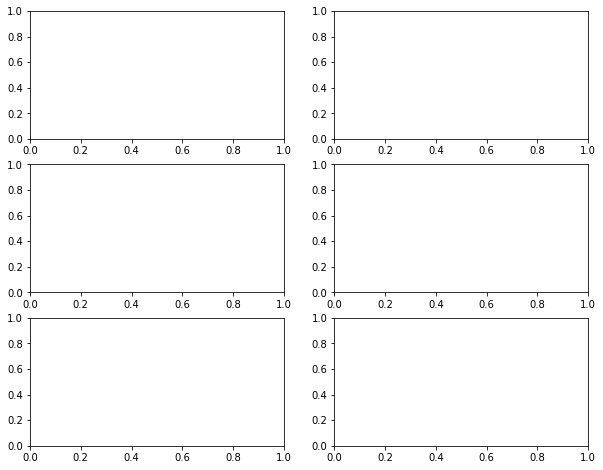

In [33]:
font = {'weight' : 'bold', 'size' : 22}
fig, axs = plt.subplots(K // 2, 2, figsize=(10, 8))

k = 0
for i in range(len(axs)):
    for j in range(len(axs[i])):
        wc = WordCloud(colormap='Greys', background_color='white')
        im = wc.generate_from_frequencies(cluster_term[clusters[k]])
        axs[i][j].imshow(im, interpolation='bilinear')
        axs[i][j].axis("off")
        axs[i][j].set_title(clusters[k], **font)
        k += 1
plt.tight_layout()
plt.show()